<a href="https://colab.research.google.com/github/hellocml/phython/blob/main/starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=&operator=AND&detailKeyword=&publicDataPk=15083033&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=%EC%83%81%EA%B6%8C%EC%A0%95%EB%B3%B4&sort=&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=

국가중점데이터인 상권정보를 살펴봅니다

**필요한 라이브러리 불러오기**



In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

**시각화를 위한 폰트 설정**

In [67]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib



In [27]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import platform
from IPython.display import set_matplotlib_formats

In [68]:
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux 등 기타 OS
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

데이터 로드하기
판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
데이터를 로드해서 df라는 변수에 담습니다.
그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [69]:
df = pd.read_csv("/content/drive/MyDrive/파이썬/실전/2. 서울 종합병원 분포 확인하기/소상공인시장진흥공단_상가(상권)정보_제주_202503.csv", low_memory=False)
df.shape

(57869, 39)

데이터 미리보기
head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [70]:
# head 로 데이터를 미리보기 합니다.
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700020809,돌체음악교습소,NaN,P1,교육,P106,기타 교육,P10609,음악학원,P85621,...,5011010500105160000028183,NaN,제주특별자치도 제주시 서광로11길 14,690812,63183,NaN,1,NaN,126.516636,33.501136


In [71]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
57868,MA0101202502A0112513,디자인연구소엠에스케이,NaN,M1,과학·기술,M112,전문 디자인,M11201,인테리어 디자인업,M73201,...,5011013700103040002008887,NaN,제주특별자치도 제주시 노연로 148,690814,63133,NaN,3,NaN,126.495946,33.485519


In [72]:
# sample 로 미리보기를 합니다.
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
9863,MA010120220806715094,정성공조,NaN,G2,소매,G208,가전·통신 소매,G20803,가전제품 소매업,G47320,...,5011011200133140005000001,아정펠리즈,제주특별자치도 제주시 거로남4길 37,690061,63304,NaN,2,NaN,126.561754,33.506632


결측치

In [74]:
null_count = df.isnull().sum()
null_count

,0
상가업소번호,0
상호명,0
지점명,54462
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
표준산업분류코드,4


<Axes: >

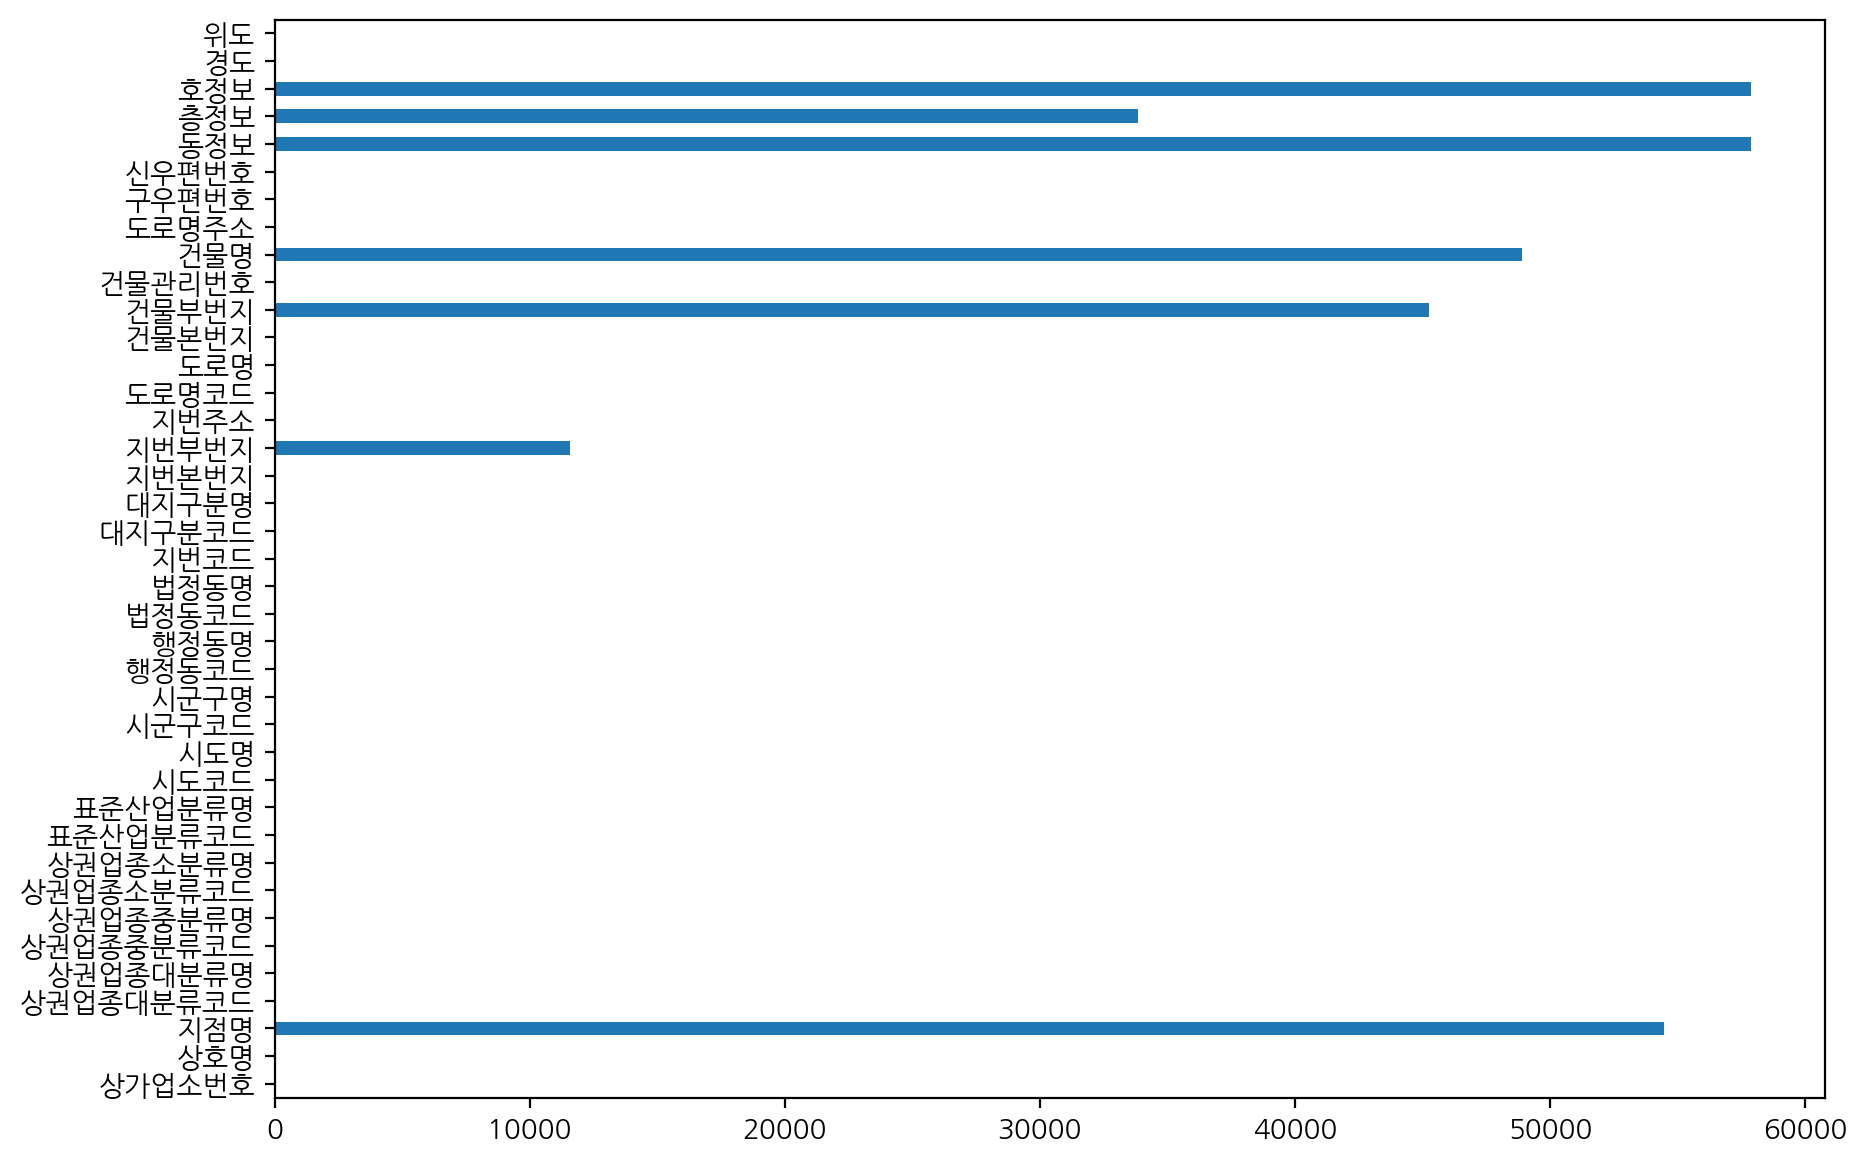

In [29]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.
df.isnull().sum().plot.barh(figsize=(10, 7))

In [30]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = df.isnull().sum().reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,54462
3,상권업종대분류코드,0
4,상권업종대분류명,0


컬럼명 변경하기

In [31]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,54462
3,상권업종대분류코드,0
4,상권업종대분류명,0


정렬하기

결측치 시각화하기



1) 기본 그래프

<Axes: >

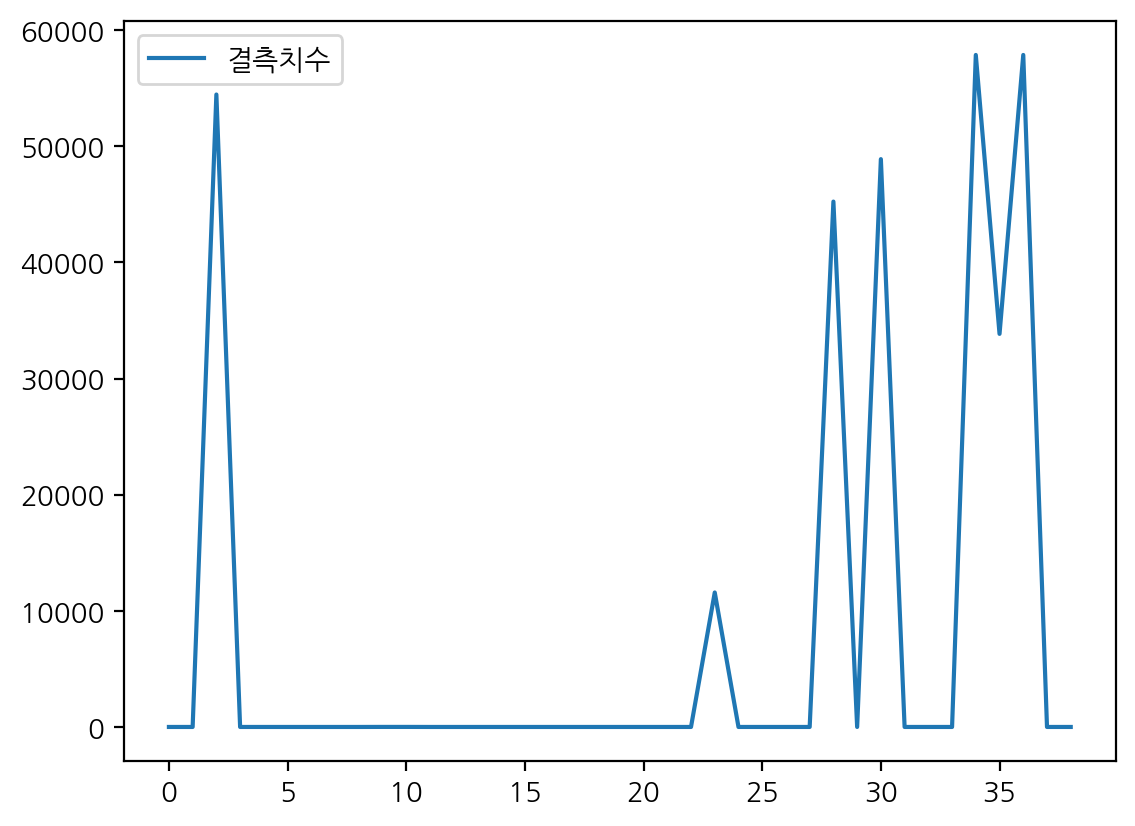

In [53]:
# 결측치의 갯수를 시각화합니다. 기본값으로 line 그래프를 그려줍니다.
df_null_count.plot()

# plot.에서 tab 키를 누르면 그릴 수 있는 다른 그래프들을 보여줍니다.

2) bar 그래프

<Axes: >

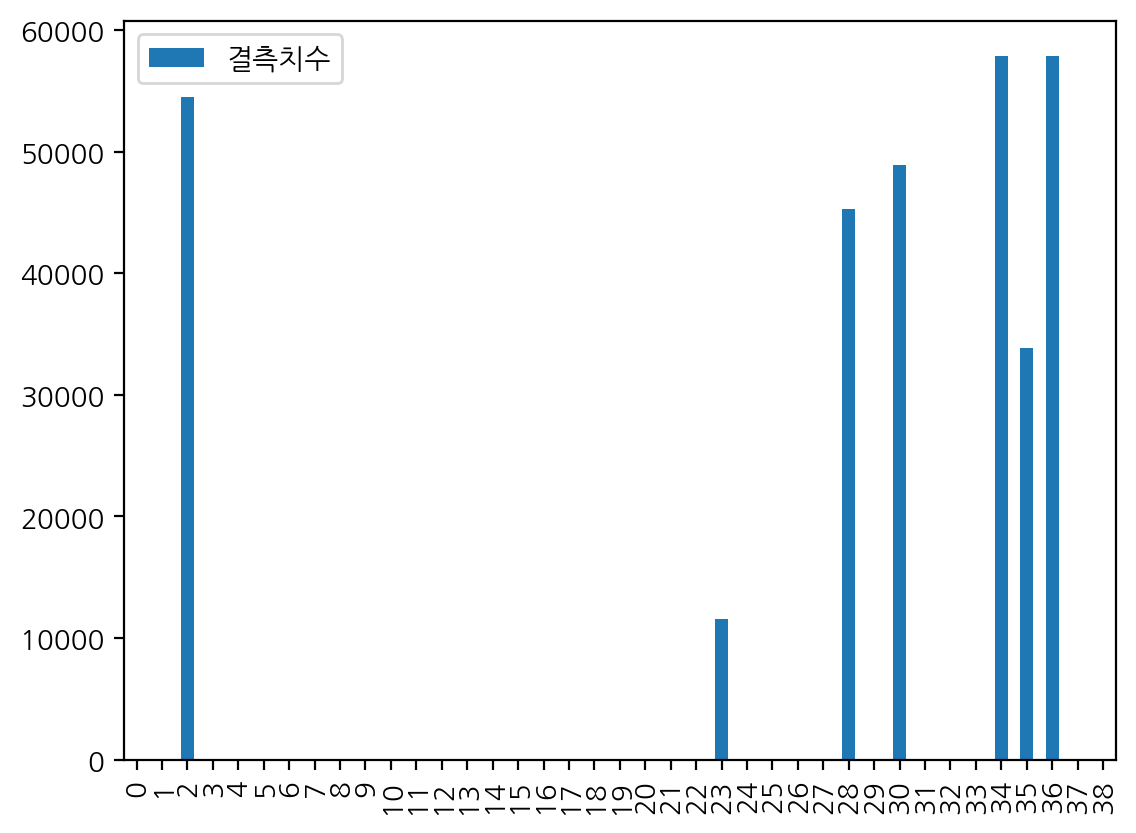

In [54]:
df_null_count.plot.bar()

3) barh 그래프

<Axes: >

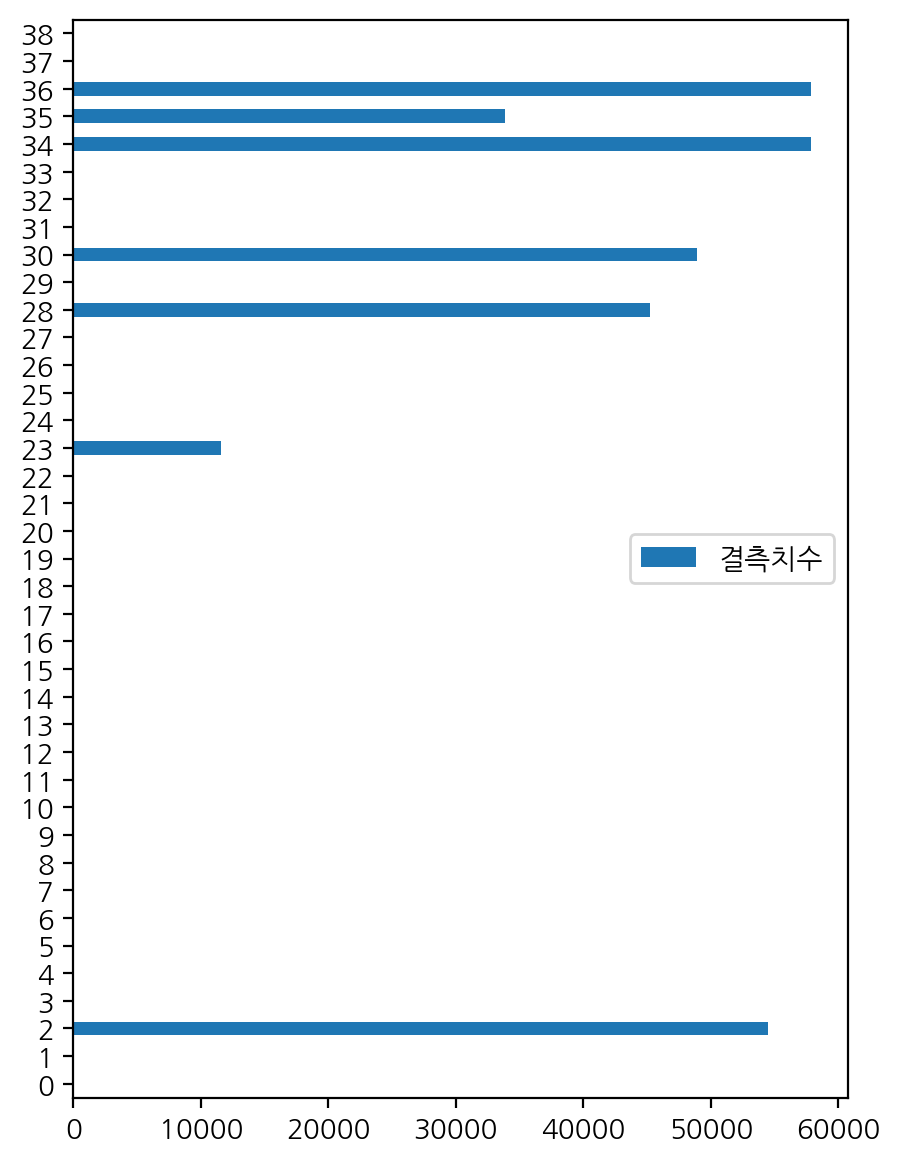

In [55]:
df_null_count.plot.barh(figsize=(5,7))

In [32]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.
df_null_head = df_null_count.sort_values(
    by="결측치수", ascending=False).head(9)
df_null_head

,컬럼명,결측치수
34,동정보,57869
36,호정보,57869
2,지점명,54462
30,건물명,48897
28,건물부번지,45242
35,층정보,33850
23,지번부번지,11580
10,표준산업분류명,4
9,표준산업분류코드,4


특정 컬럼만 불러오기

In [59]:
# 지점명 컬럼을 불러옵니다.
df["지점명"].head(1)

KeyError: '지점명'

In [57]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
drop_columns = df_null_head["컬럼명"].values
drop_columns

array(['동정보', '호정보', '지점명', '건물명', '건물부번지', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'], dtype=object)

In [58]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

KeyError: "None of [Index(['동정보', '호정보', '지점명', '건물명', '건물부번지', '층정보', '지번부번지', '표준산업분류명',\n       '표준산업분류코드'],\n      dtype='object')] are in the [columns]"

제거하기

In [37]:
print(df.shape)
df = df.drop(columns=drop_columns, axis=1)
print(df.shape)

(57869, 39)
(57869, 30)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57869 entries, 0 to 57868
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     57869 non-null  object 
 1   상호명        57869 non-null  object 
 2   상권업종대분류코드  57869 non-null  object 
 3   상권업종대분류명   57869 non-null  object 
 4   상권업종중분류코드  57869 non-null  object 
 5   상권업종중분류명   57869 non-null  object 
 6   상권업종소분류코드  57869 non-null  object 
 7   상권업종소분류명   57869 non-null  object 
 8   시도코드       57869 non-null  int64  
 9   시도명        57869 non-null  object 
 10  시군구코드      57869 non-null  int64  
 11  시군구명       57869 non-null  object 
 12  행정동코드      57869 non-null  int64  
 13  행정동명       57869 non-null  object 
 14  법정동코드      57869 non-null  int64  
 15  법정동명       57869 non-null  object 
 16  지번코드       57869 non-null  int64  
 17  대지구분코드     57869 non-null  int64  
 18  대지구분명      57869 non-null  object 
 19  지번본번지      57869 non-null  int64  
 20  지번주소  

기초 통계값 보기

기초 통계 수치

기초통계값 요약하기 - describe

In [39]:
# 위도를 describe로 요약해 봅니다.
df["위도"].describe()

,위도
count,57869.000000
mean,33.429202
std,0.107412
min,33.114152
25%,33.329027
50%,33.483723
75%,33.500385
max,33.964032


In [40]:
# 2개의 컬럼을 describe 로 요약합니다.
df[["위도", "경도"]].describe()

,위도,경도
count,57869.000000,57869.000000
mean,33.429202,126.521692
std,0.107412,0.155867
min,33.114152,126.163501
25%,33.329027,126.469887
50%,33.483723,126.522070
75%,33.500385,126.564094
max,33.964032,126.970008


In [41]:
# describe로 문자열 데이터타입의 요약을 봅니다.

df.describe(include="object")

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869,57869
unique,57869,54300,10,10,74,74,246,246,1,2,43,73,2,32143,3362,32561,32551
top,MA0101202502A0112513,씨유제주,I2,음식,I201,한식,I10103,펜션,제주특별자치도,제주시,연동,연동,대지,제주특별자치도 서귀포시 서호동 1605,제주특별자치도 제주시 중앙로,5013010300116050000000001,제주특별자치도 서귀포시 서호중앙로 55
freq,1,31,19445,19445,8555,8555,5975,5975,57869,41534,4610,4610,57675,334,1406,334,334


중복제거한 값 보기
unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [42]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['교육', '소매', '보건의료', '음식', '숙박', '과학·기술', '수리·개인', '시설관리·임대',
       '예술·스포츠', '부동산'], dtype=object)

In [44]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['기타 교육', '식료품 소매', '의원', '주점', '의약·화장품 소매', '일반 숙박', '가구 소매',
       '사진 촬영', '장식품 소매', '종합 소매', '기타 간이', '비알코올 ', '이용·미용', '가전·통신 소매',
       '광고', '욕탕·신체관리', '청소·방제', '안경·정밀기기 소매', '한식', '전문 디자인', '사무 지원',
       '기술 서비스', '세탁', '유원지·오락', '섬유·의복·신발 소매', '자동차 수리·세차', '가정용품 대여',
       '일식', '부동산 서비스', '오락용품 소매', '여행사·보조', '기타 사업 서비스', '동남아시아',
       '법무관련 ', '교육 지원', '중식', '시장 조사', '일반 교육', '본사·경영 컨설팅', '음료 소매',
       '연료 소매', '산업용품 대여', '회계·세무', '시설관리', '스포츠 서비스', '운송장비 대여', '식물 소매',
       '애완동물·용품 소매', '장례식장 ', '철물·건설자재 소매', '기타 생활용품 소매', '기타 전문 과학',
       '가전제품 수리', '고용 알선', '도서관·사적지', '인쇄·제품제작', '자동차 부품 소매', '기타 상품 소매',
       '기타 보건', '서양식', '중고 상품 소매', '모터사이클 소매', '조경·유지', '시계·귀금속 소매',
       '구내식당·뷔페', '기타 숙박', '통신장비 수리', '기타 가정용품 수리', '컴퓨터 수리', '수의', '병원',
       '기타 개인', '모터사이클 수리', '담배 소매'], dtype=object)

In [45]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['음악학원', '건어물/젓갈 소매업', '내과/소아과 의원', '일반 유흥 주점', '의료기기 소매업', '펜션',
       '가구 소매업', '사진촬영업', '기념품점', '편의점', '빵/도넛', '카페', '미용실', '핸드폰 소매업',
       '김밥/만두/분식', '광고물 설계/제작업', '목욕탕/사우나', '건축물 일반 청소업', '옥외/전시 광고 대행업',
       '안경렌즈 소매업', '백반/한정식', '시각 디자인업', '복사업', '건축 설계 및 관련 서비스업',
       '셀프 빨래방', '요가/필라테스 학원', '노래방', '피부 관리실', '네일숍', '가방 소매업', '생맥주 전문',
       '자동차 세차장', '스포츠/레크리에이션 용품 대여업', '족발/보쌈', '일식 회/초밥', '여관/모텔', '정육점',
       '치킨', '마사지/안마', '청소년 수련시설', '부동산 중개/대리업', '운동용품 소매업', '요리 주점',
       '횟집', '여행사', '전시/컨벤션/행사 대행 서비스업', '돼지고기 구이/찜', '직원 훈련기관', '슈퍼마켓',
       '베트남식 전문', '법무사', '국/탕/찌개류', '국수/칼국수', '세탁소', '기타 교육지원 서비스업',
       '광고 대행업', '중국집', '시장 조사 및 여론 조사업', '입시·교과학원', '경영 컨설팅업',
       '기타 의류 소매업', '일식 카레/돈가스/덮밥', '닭/오리고기 구이/찜', '주류 소매업', '가전제품 소매업',
       '해산물 구이/찜', '가정용 연료 소매업', '기타 산업용 기계/장비 대여업', '세무사',
       '사업시설 유지·관리 서비스업', '기타 기술/직업 훈련학원', '헬스장', '남성 의류 소매업',
       '기타 운송장비 대여업', '꽃집', '자동차 정비소', '여성 의류 소매업', '반찬/식료품 소매업',
       '기타 개인/가정용품 대여업', '인

<Axes: ylabel='시도명'>

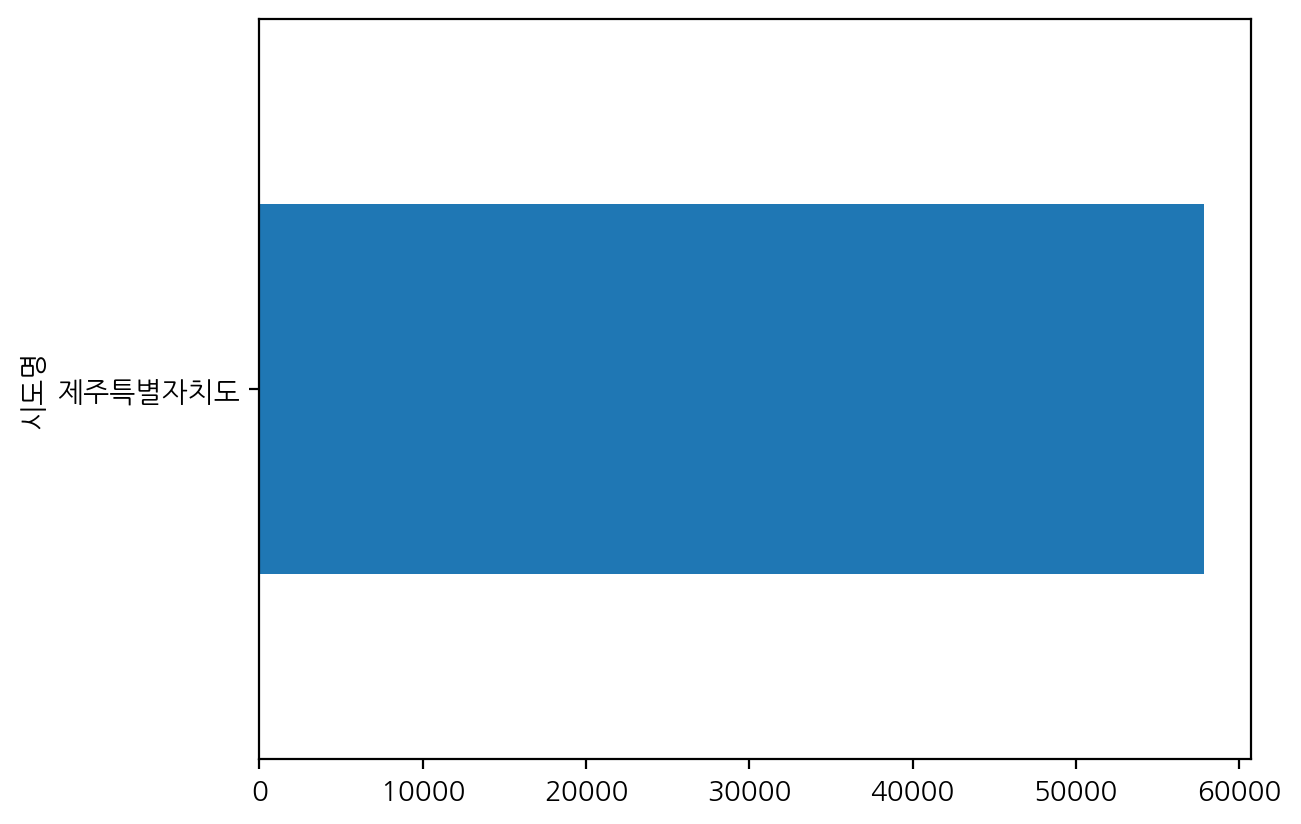

In [46]:
# Pandas 에는 plot기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
df["시도명"].value_counts().plot.barh()

<Axes: ylabel='count'>

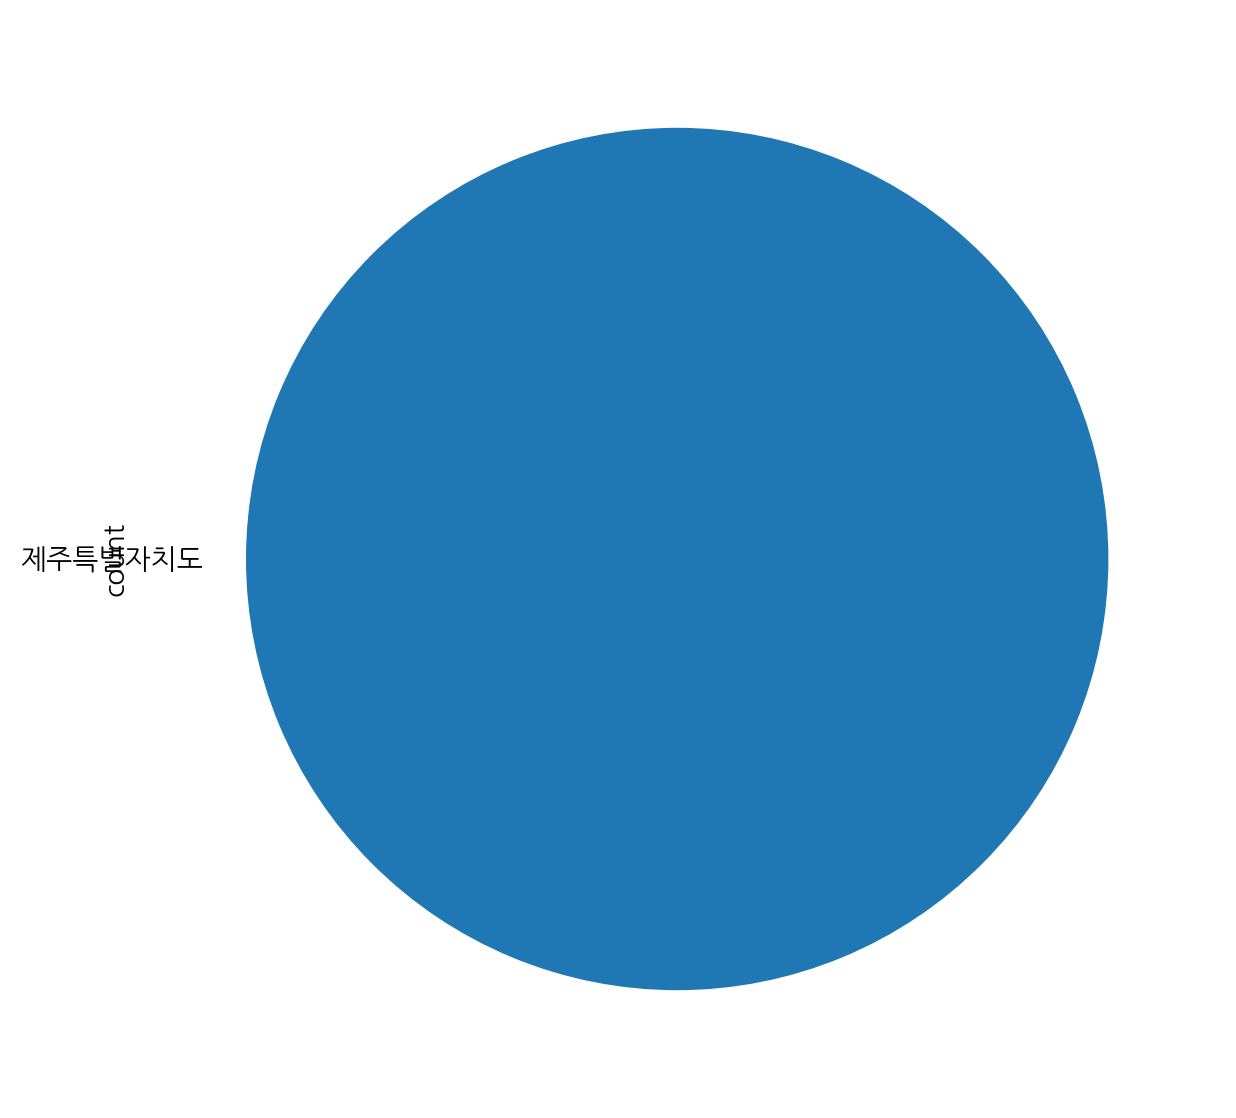

In [47]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["시도명"].value_counts().plot.pie(figsize=(7, 7))

<Axes: xlabel='count', ylabel='시도명'>

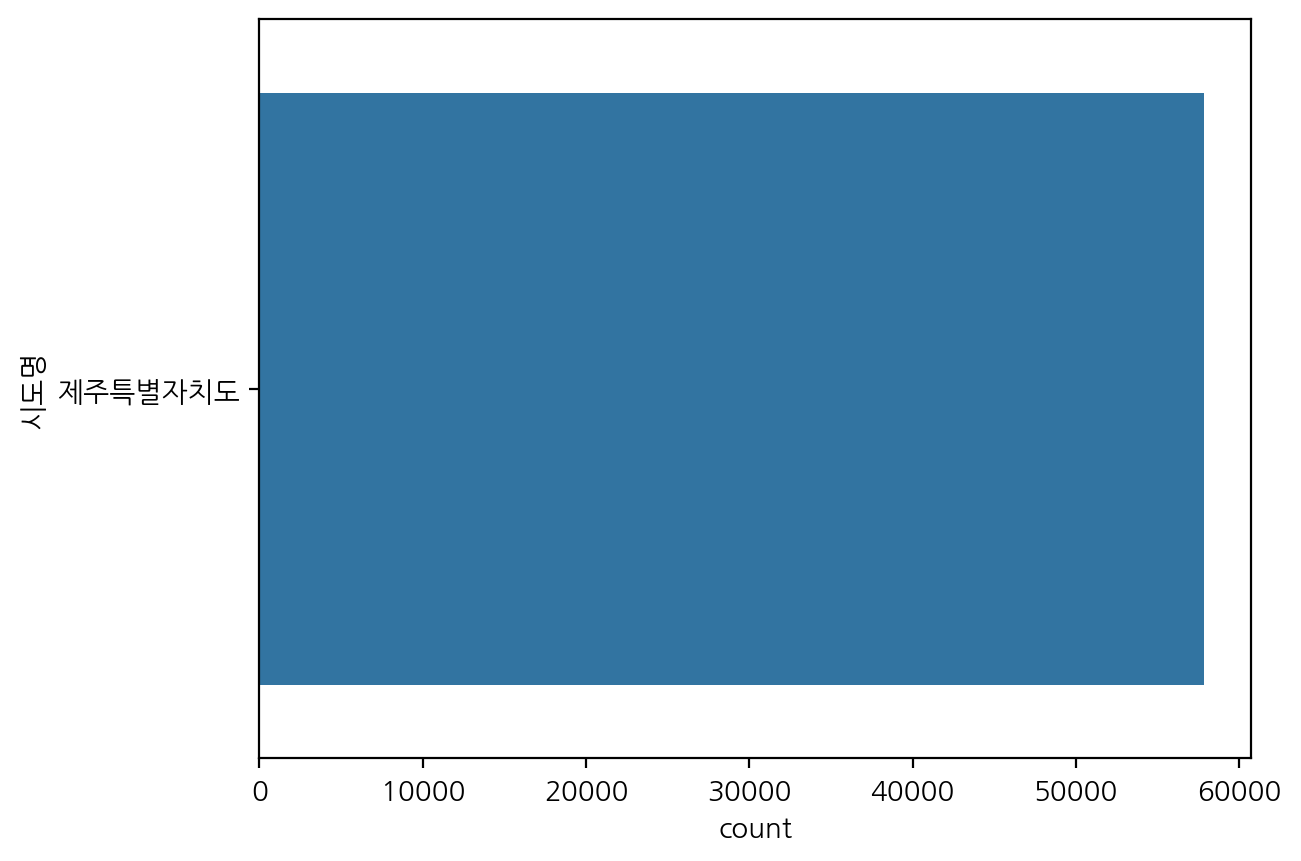

In [48]:
sns.countplot(data=df, y="시도명")

In [49]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()

,count
상권업종대분류명,
음식,19445
소매,12173
숙박,7238
수리·개인,4916
과학·기술,4043
시설관리·임대,3060
교육,2893
예술·스포츠,1874
부동산,1859


In [50]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
df["상권업종중분류명"].value_counts()

,count
상권업종중분류명,
한식,8555
일반 숙박,7216
기타 간이,3121
비알코올,3075
주점,2763
...,...
담배 소매,35
통신장비 수리,23
기타 숙박,22
